## Dataset Overview

**Dataset Title:** Traffic Index in Saudi Arabia and Middle East.  

**Source Link:** https://www.kaggle.com/datasets/majedalhulayel/traffic-index-in-saudi-arabia-and-middle-east  

**Description:** This dataset contains traffic index data for Saudi Arabia and other Middle Eastern cities, including Cairo. The dataset includes traffic index, jam counts, and jam lengths at an hourly frequency. It can be analyzed to understand the reasons behind traffic.  

**Why did I choose this dataset?** During my coop training at TAHAKOM, I worked on different projects that benefited from traffic data. Some of these projects studied traffic patterns to gain insights for business value, while others focused on predicting traffic to prevent congestion in the first place. After this training, I found myself understanding traffic better and discovering new perspectives about it.

##  Problem Definition

This project aims to analyze traffic patterns in Saudi Arabia and other Middle Eastern cities using hourly traffic index data, jam counts, and jam lengths.

Main questions to explore:

1. Which Middle Eastern cities have the highest average traffic?

2. What are the peak congestion hours across all cities?

3. Do weekends show significantly lower congestion than weekdays?

4. Which city experiences the most extreme congestion events?

5. Are there cities with consistently stable versus volatile traffic patterns?

6. Can last week’s traffic index predict current traffic levels?

At the end of this analysis, I expect to gain real insights into traffic trends, temporal congestion patterns, differences between weekdays and weekends, and predictive relationships in traffic behavior.

## Data Loading & Structure

### Step 1: Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import streamlit as st
import missingno as msno
print("All packages installed and imported successfully!")

All packages installed and imported successfully!


### Step 2: Loading the dataset into a DataFrame

In [3]:
df=pd.read_csv("traffic_index.csv")

### Step 3: Displaying first 5 rows using pandas

In [5]:
df.head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246


### Step 4: Dataset shape

In [ ]:
df.shape

(66639, 9)

### Step 5: Data types

**Dataset Features Description**

**City**:  
Name of the city for which the traffic and travel-time metrics are calculated.

**Datetime**:  
The date and time when this traffic snapshot was recorded or aggregated.

**TrafficIndexLive**:  
A numeric index that represents how severe traffic is “right now” compared to free-flow conditions in that city.  
Higher values usually mean more congestion and longer travel times.

**JamsCount**:  
The number of distinct traffic jams currently detected in the city road network.

**JamsDelay**:  
The additional average delay caused by all current jams compared with free-flow travel, measured in minutes.  
Larger values mean people are spending more extra time in traffic.

**JamsLength**:  
The total length of all current traffic jams combined, measured in kilometers.  
A higher number means more road distance is congested.

**TrafficIndexWeekAgo**:  
Traffic index value for the same city and a comparable time one week earlier.

**TravelTimeHistoric**:  
Typical or average travel time for the reference route under normal conditions, measured in minutes.  
Represents what travel time “usually” looks like at that time and day.

**TravelTimeLive**:  
Current live travel time for the same reference route using real-time traffic speeds, measured in minutes.  
If this is higher than TravelTimeHistoric, it indicates conditions are worse than normal; if lower, traffic is flowing better than usual.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66639 entries, 0 to 66638
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 66639 non-null  object 
 1   Datetime             66639 non-null  object 
 2   TrafficIndexLive     66639 non-null  int64  
 3   JamsCount            66639 non-null  int64  
 4   JamsDelay            66639 non-null  float64
 5   JamsLength           66639 non-null  float64
 6   TrafficIndexWeekAgo  66639 non-null  int64  
 7   TravelTimeHistoric   62772 non-null  float64
 8   TravelTimeLive       62772 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 4.6+ MB


### Step 6: Dataset statistics

In [8]:
df.describe()

,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
count,66639.000000,66639.000000,66639.000000,66639.000000,66639.000000,62772.000000,62772.000000
mean,14.043113,74.278531,288.353877,49.316135,13.981737,70.706601,70.048451
std,13.488906,107.452022,470.013224,85.352525,13.454922,10.588384,11.966725
min,0.000000,0.000000,0.000000,0.000000,0.000000,49.381346,46.723235
25%,3.000000,9.000000,27.700000,3.000000,3.000000,63.142591,60.712805
50%,10.000000,29.000000,95.700000,12.200000,10.000000,68.894790,68.247303
75%,21.000000,95.000000,336.600000,53.500000,21.000000,76.250975,77.043739
max,138.000000,1359.000000,9989.400000,1173.900000,138.000000,120.140593,134.484139


### Step 7: Checking missing values

In [9]:
df.isnull().sum()

City                      0
Datetime                  0
TrafficIndexLive          0
JamsCount                 0
JamsDelay                 0
JamsLength                0
TrafficIndexWeekAgo       0
TravelTimeHistoric     3867
TravelTimeLive         3867
dtype: int64

## Data cleaning 

### Step 1: Remove duplicates 

In [10]:
df.duplicated().sum()

np.int64(0)

No duplicates found to remove

### Step 2: Handle missing values

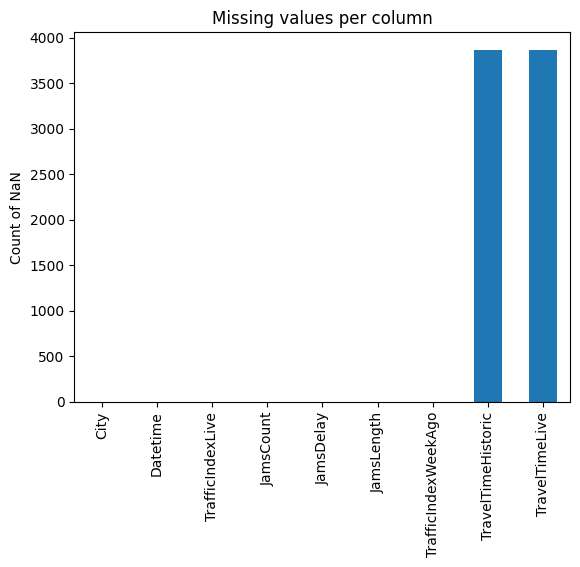

In [11]:
df.isna().sum().plot(kind="bar")
plt.title("Missing values per column")
plt.ylabel("Count of NaN")
plt.show()

The missing values in the two columns, TravelTimeHistoric and TravelTimeLive, represent a significant portion and need to be investigated further to determine the best way to handle them. 

First: Are these two columns always missing together?
For answering this question will use .mean() function on a True/False result from isna().
So when the mean = 1, this means 100% of these values are True, and in our case that means they are all missing together.

In [17]:
(df["TravelTimeHistoric"].isna() == df["TravelTimeLive"].isna()).mean()


np.float64(1.0)

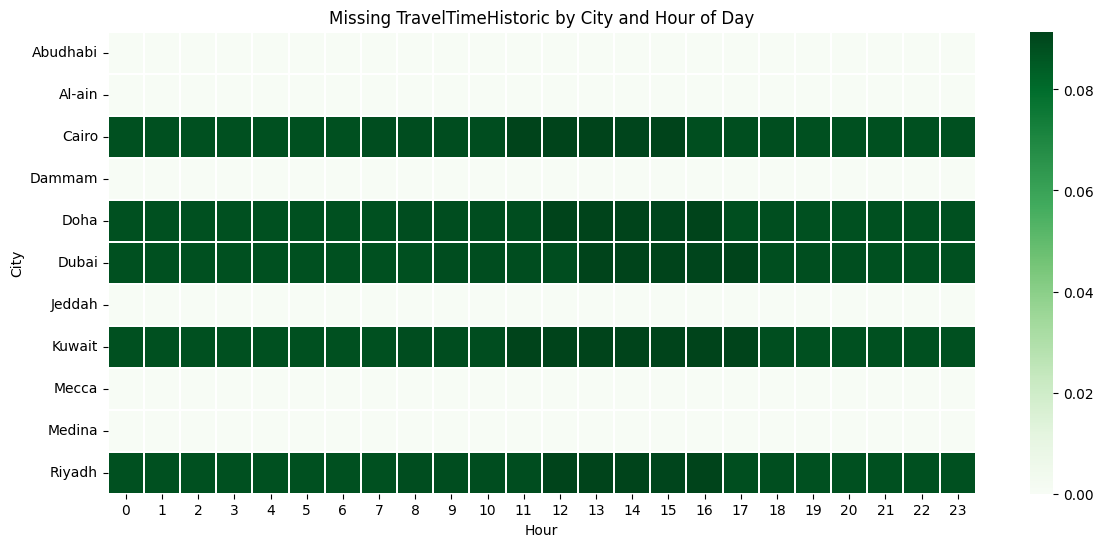

In [7]:
temp = df[["Datetime", "City", "TravelTimeHistoric"]].copy()

# Convert Datetime to datetime type
temp["Datetime"] = pd.to_datetime(temp["Datetime"], errors='coerce')

# Extract hour
temp["hour"] = temp["Datetime"].dt.hour

# Create missing indicator
temp["missing_hist"] = temp["TravelTimeHistoric"].isna().astype(int)

# average missing by city and hour
pivot = temp.pivot_table(
    index="City",
    columns="hour",
    values="missing_hist",
    aggfunc="mean"
)

# Heatmap
plt.figure(figsize=(14,6))
sns.heatmap(pivot, cmap="Greens", linewidths=0.3)
plt.title("Missing TravelTimeHistoric by City and Hour of Day")
plt.xlabel("Hour")
plt.ylabel("City")
plt.show()


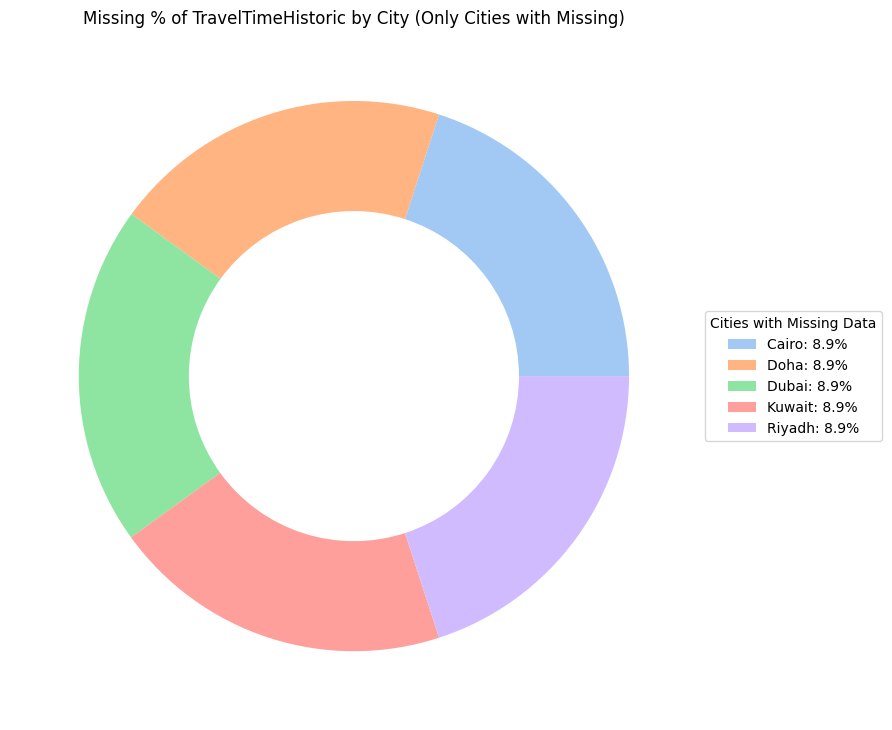

In [ ]:
# Missing percent per city
missing_percent = (
    df.groupby("City")["TravelTimeHistoric"]
      .apply(lambda x: x.isna().mean() * 100)
)

# Remove cities with 0% missing from showing on the plot
missing_percent = missing_percent[missing_percent > 0]

colors = sns.color_palette("pastel", n_colors=len(missing_percent))

plt.figure(figsize=(9,9))

wedges, _ = plt.pie(
    missing_percent,
    colors=colors,
    wedgeprops=dict(width=0.4)
)

plt.legend(
    wedges,
    [f"{city}: {percent:.1f}%" for city, percent in missing_percent.items()],
    title="Cities with Missing Data",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.title("Missing % of TravelTimeHistoric by City")
plt.tight_layout()
plt.show()


In my dataset, two numerical variables, TravelTimeHistoric and TravelTimeLive. Before choosing an imputation strategy, I will follow a structured approach based on a standard missing-data guideline [1] by analyzing three main factors:
1. Missing data mechanism(Missing Completely at Random (MCAR), Missing at Random (MAR), or Missing Not at Random (MNAR))
2. Type of data
3. Proportion of missing values

#### **First Factor**

The missingness is best described as MAR because it depends on observed patterns rather than the true travel-time values. Both TravelTimeHistoric and TravelTimeLive miss together, reflecting a shared system or operational factor. Since missingness is predictable from these observable conditions but not from the unobserved values themselves, MAR is the most appropriate.

The missingness is not MNAR because it is not caused by the actual travel-time values. There is no evidence that extreme or unusual travel times trigger missing data. Missingness occurs uniformly across cities and hours, showing it is independent of the underlying values.

The missingness is not fully MCAR because it does not occur completely at random. Both variables consistently miss together, indicating a systematic factor influencing data availability. To confirm this, I performed a t-test comparing rows with missing versus non-missing values, which evaluates whether the missingness is independent of observed data. With a p-value of 5.297 × 10⁻⁵⁹ (p < 0.05), the null hypothesis of MCAR is rejected.


In [17]:
from scipy.stats import ttest_ind

# Split by missingness
group_missing = df[df['TravelTimeHistoric'].isna()]['TrafficIndexLive']
group_not_missing = df[df['TravelTimeHistoric'].notna()]['TrafficIndexLive']

stat, p = ttest_ind(group_missing, group_not_missing, nan_policy='omit')
print("t-test p-value:", p)


t-test p-value: 5.2971107216709355e-59


#### **Second Factor**
The missing values are numircal.
#### **Third Factor**
Proportion of Missing Values = 5.802% which is calculted: (Number of missing values in Column / Total number of rows in dataset) * 100


After considering the three factors I chose K-Nearest Neighbors (KNN) imputation to fill missing values. With k = 5.

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler 

# Parse datetime 
df["Datetime"] = pd.to_datetime(df["Datetime"])

#Convert the categorical "City" column into numerical dummy variables so KNN can use it for distance calculation
df_encoded = pd.get_dummies(df, columns=["City"], prefix="City")

# Transform datetime into a continuous numeric variable (seconds since epoch) for distance calculations
df_encoded["Datetime_num"] = df_encoded["Datetime"].view("int64") / 1e9

num_cols = [
    "TrafficIndexLive",
    "JamsCount",
    "JamsDelay",
    "JamsLength",
    "TrafficIndexWeekAgo",
    "Datetime_num",
    "TravelTimeHistoric",
    "TravelTimeLive",
]

city_cols = [c for c in df_encoded.columns if c.startswith("City_")]

# Scale numeric features
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(df_encoded[num_cols])

# Concatenate scaled numeric + unscaled city dummies
X_all = np.concatenate([X_num_scaled, df_encoded[city_cols].values], axis=1)

# KNN imputer on scaled data
imputer = KNNImputer(n_neighbors=5, weights="distance")
X_all_imputed = imputer.fit_transform(X_all)

# Splitting back numeric part and inverse scale
X_num_imputed_scaled = X_all_imputed[:, :len(num_cols)]
X_num_imputed = scaler.inverse_transform(X_num_imputed_scaled)

# Putting imputed numeric columns back
df_encoded[num_cols] = X_num_imputed

# Coping the imputed targets into original df
df["TravelTimeHistoric"] = df_encoded["TravelTimeHistoric"]
df["TravelTimeLive"] = df_encoded["TravelTimeLive"]

# Saving the result
df.to_csv("traffic_index_imputed.csv", index=False)


C:\Users\bayde\AppData\Local\Temp\ipykernel_28944\1012219900.py:16: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  df_encoded["Datetime_num"] = df_encoded["Datetime"].view("int64") / 1e9


In [ ]:
#Testing the result of the imputing the missing values
df2= pd.read_csv("traffic_index_imputed.csv")
missing_by_city = (
    df2.groupby("City")[["TravelTimeHistoric", "TravelTimeLive"]]
      .apply(lambda g: g.isna().sum())
)

print(missing_by_city)

          TravelTimeHistoric  TravelTimeLive
City                                        
Abudhabi                   0               0
Al-ain                     0               0
Cairo                      0               0
Dammam                     0               0
Doha                       0               0
Dubai                      0               0
Jeddah                     0               0
Kuwait                     0               0
Mecca                      0               0
Medina                     0               0
Riyadh                     0               0


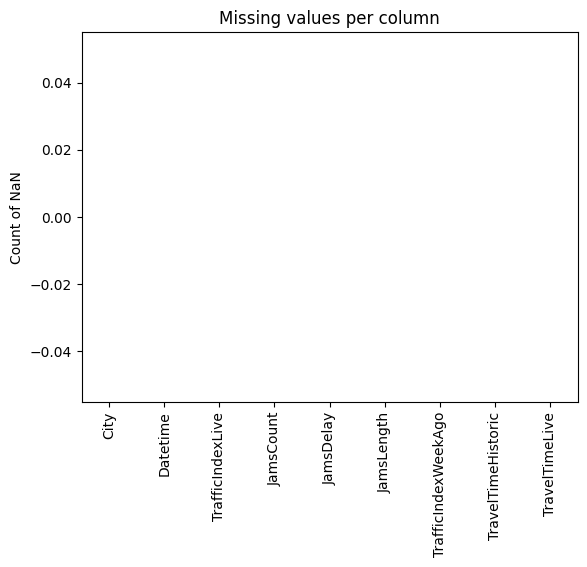

In [18]:
df2.isna().sum().plot(kind="bar")
plt.title("Missing values per column")
plt.ylabel("Count of NaN")
plt.show()

### Step 3: Rename columns

In [ ]:
df = df.rename(columns={
    "City": "city",
    "Datetime": "datetime",
    "TrafficIndexLive": "traffic_index_live",
    "JamsCount": "jams_count",
    "JamsDelay": "jams_delay",
    "JamsLength": "jams_length",
    "TrafficIndexWeekAgo": "traffic_index_week_ago",
    "TravelTimeHistoric": "travel_time_historic",
    "TravelTimeLive": "travel_time_live"
})

# Save the fully cleaned & imputed file
df.to_csv("traffic_index_cleaned.csv", index=False)
print("File saved as traffic_index_cleaned.csv")


File saved as traffic_index_cleaned.csv


### Step 4: Dropping rows where city is Cairo 

In [ ]:
import pandas as pd
df=  pd.read_csv("traffic_index_cleaned.csv")
df = df[df["city"] != "Cairo"]

df.to_csv("cleaned_traffic_index_gcc.csv", index=False)
print("File saved without Cairo rows!")

File saved without Cairo rows!


## Exploratory data analysis

In this section, will answer the main questions assumed in the start of the analysis
1. Which Middle Eastern cities have the highest average traffic?

2. What are the peak congestion hours across all cities?

3. Do weekends show significantly lower congestion than weekdays?

4. Which city experiences the most extreme congestion events?

5. Are there cities with consistently stable versus volatile traffic patterns?

6. Can last week’s traffic index predict current traffic levels?

In [18]:
# Load dataset
df = pd.read_csv("cleaned_traffic_index_gcc.csv", parse_dates=['datetime'])

# Add useful columns
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.dayofweek  # Monday=0, Sunday=6
df['is_weekend'] = df['day_of_week'] >= 5

**Q1:** Which Middle Eastern cities have the highest average traffic?

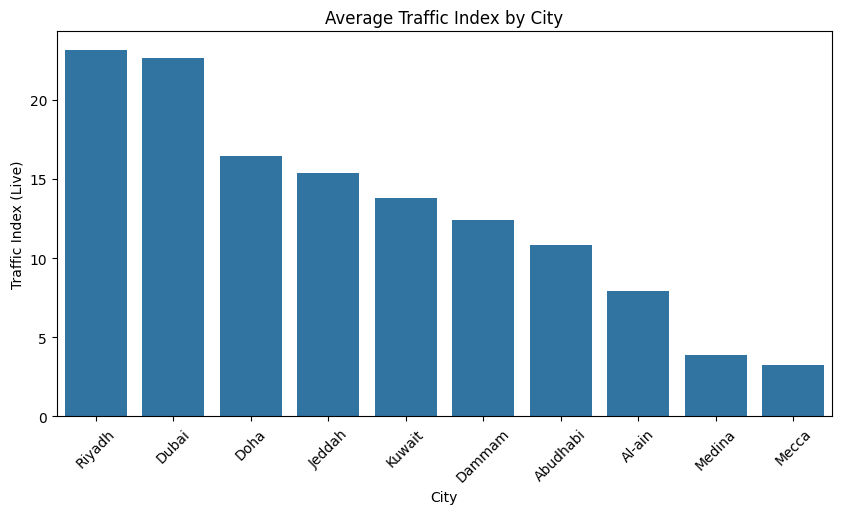

In [20]:
avg_traffic_city = df.groupby('city')['traffic_index_live'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_traffic_city.index, y=avg_traffic_city.values)
plt.title("Average Traffic Index by City")
plt.ylabel("Traffic Index (Live)")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.show()


**Q2:** What are the peak congestion hours across all cities?

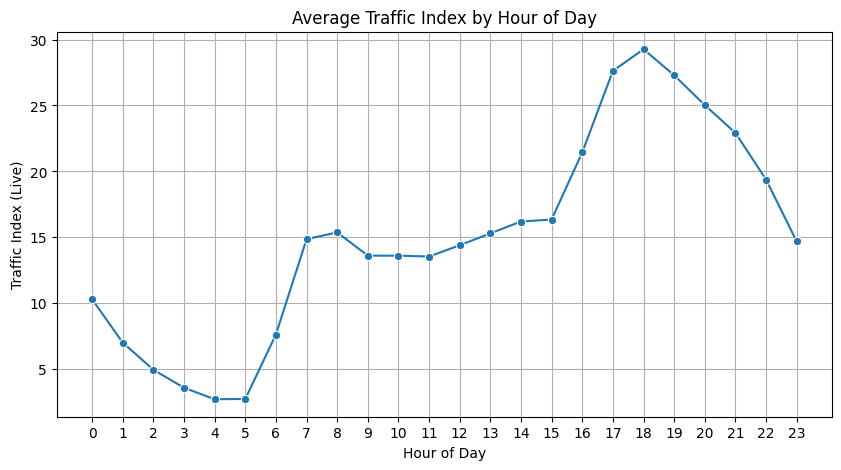

In [22]:
avg_traffic_hour = df.groupby('hour')['traffic_index_live'].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=avg_traffic_hour.index, y=avg_traffic_hour.values, marker='o')
plt.title("Average Traffic Index by Hour of Day")
plt.ylabel("Traffic Index (Live)")
plt.xlabel("Hour of Day")
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

**Q3:** Do weekends show significantly lower congestion than weekdays?

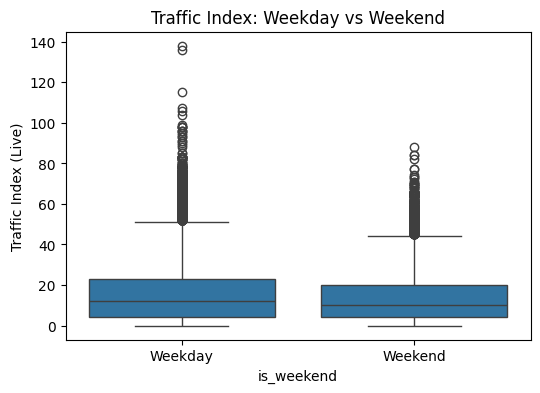

In [23]:
avg_weekday = df[df['is_weekend'] == False]['traffic_index_live'].mean()
avg_weekend = df[df['is_weekend'] == True]['traffic_index_live'].mean()

plt.figure(figsize=(6,4))
sns.boxplot(x='is_weekend', y='traffic_index_live', data=df)
plt.xticks([0,1], ['Weekday','Weekend'])
plt.title("Traffic Index: Weekday vs Weekend")
plt.ylabel("Traffic Index (Live)")
plt.show()

**Q4:** Which city experiences the most extreme congestion events?

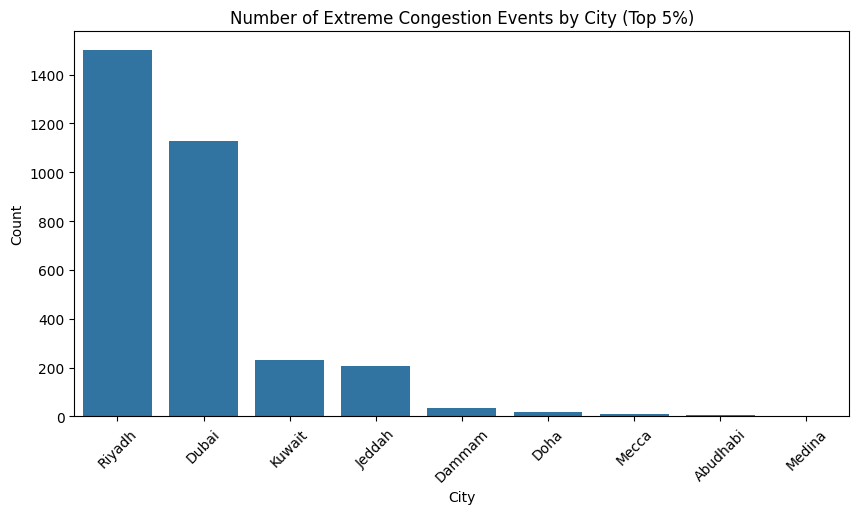

In [24]:
threshold = df['traffic_index_live'].quantile(0.95)
extreme_events = df[df['traffic_index_live'] >= threshold]
extreme_counts = extreme_events['city'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=extreme_counts.index, y=extreme_counts.values)
plt.title("Number of Extreme Congestion Events by City (Top 5%)")
plt.ylabel("Count")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.show()

**Q5:** Are there cities with consistently stable versus volatile traffic patterns?

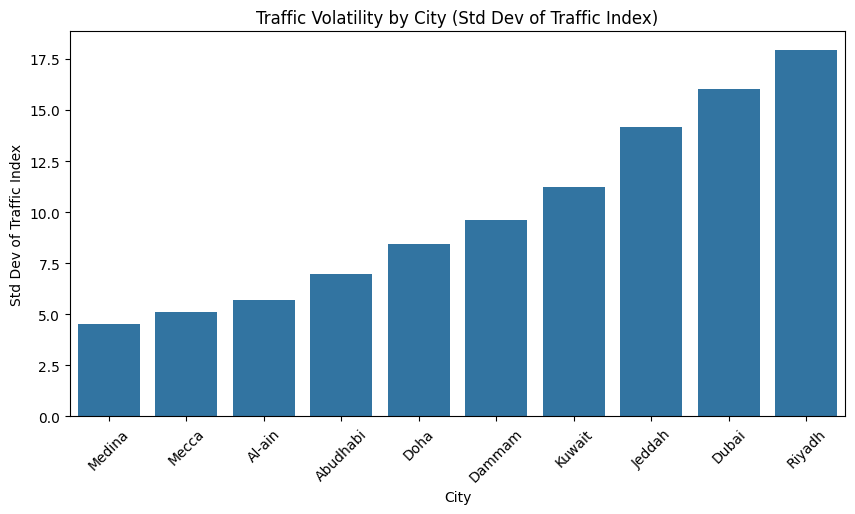

In [25]:
# Use standard deviation as volatility
volatility = df.groupby('city')['traffic_index_live'].std().sort_values()

plt.figure(figsize=(10,5))
sns.barplot(x=volatility.index, y=volatility.values)
plt.title("Traffic Volatility by City (Std Dev of Traffic Index)")
plt.ylabel("Std Dev of Traffic Index")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.show()

**Q6:** Can last week’s traffic index predict current traffic levels?

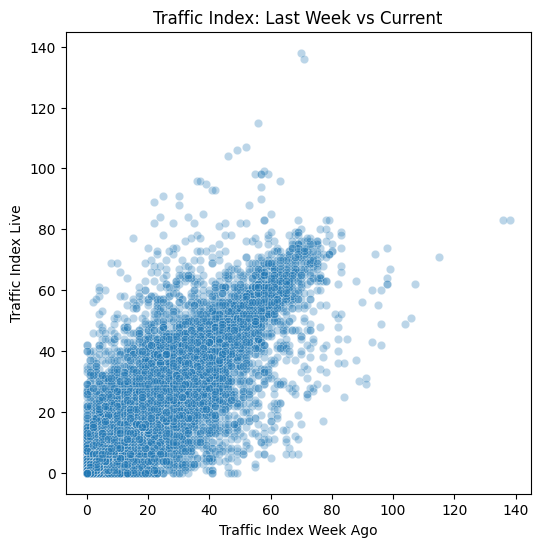

In [26]:
correlation = df[['traffic_index_week_ago','traffic_index_live']].corr().iloc[0,1]

plt.figure(figsize=(6,6))
sns.scatterplot(x='traffic_index_week_ago', y='traffic_index_live', data=df, alpha=0.3)
plt.title("Traffic Index: Last Week vs Current")
plt.xlabel("Traffic Index Week Ago")
plt.ylabel("Traffic Index Live")
plt.show()

## Insights Summary

Traffic is generally moderate but can spike sharply during peak daytime hours, with the median traffic index around 10 and the average about 14, yet rare events reaching as high as 138 in some records. Jam-related metrics show a similar pattern: the median jam count is about 29 with an average near 74, but extreme cases exceed 1,300 jams; median jam length is roughly 12.2 with an average near 49, while outliers go beyond 1,170 units; and median delay is about 95.7 with an average close to 288, yet the maximum delay approaches 9,989 minutes. All congestion metrics like traffic index, jam count, jam length, and delays—tend to rise together, so monitoring any one of them gives a reliable picture of overall traffic stress, and travel times (historic vs. live) are also closely aligned in magnitude, reinforcing these relationships. Cities show meaningful differences in typical congestion levels, and these rare but intense outliers, which sit far above the 75th percentile for each metric, highlight the importance of explicitly accounting for extreme events rather than just average conditions when designing traffic management and prediction strategies.

## References:
[1]. https://medium.com/@tarangds/a-comprehensive-guide-to-data-imputation-techniques-strategies-and-best-practices-152a10fee543